In [9]:
# Importar paquetes
import seaborn as sns
import pandas as pd
import pdfkit
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import plotly.express as px
engine = create_engine('sqlite:///C:\\Users\\sexzai\\Pistas_de_aterrizaje_por_continente\\OurAirports_DataSource.sqlite')

query = "SELECT * FROM SA_Airports;"
sa_airports = pd.read_sql_query(query, engine)
sa_airports.to_csv('SA_Airports.csv', index=False)
#Transfotmacion de variables
sa_airports['code'] = pd.Categorical(sa_airports['code'])
sa_airports['ident'] = pd.Categorical(sa_airports['ident'])
sa_airports['name'] = pd.Categorical(sa_airports['name'])
sa_airports['type'] = pd.Categorical(sa_airports['type'])
sa_airports['surface'] = pd.Categorical(sa_airports['surface'])

# Análisis sobre pistas de Aterrizaje en Latinoamérica
Por: Giovanni Fermin, Geremi Cardenas, Alejandro Zerpa, David Bermudez y Diego Quiroz

# Metodología
Este informe se realiza con la data de "OurAirports_DataSource" extraída de Kaggle con la finalidad de analizar las pistas de aterrizaje contenidas en dicha base de datos, específicamente las pistas de aterrizaje de Sur América. Para ello se realizó una inspección previa de la base de datos en SQLite como Sistema Gestor de Bases de Datos. 

Luego de la inspección se realizó la creación de una nueva entidad llamada "SA_Airports", en dicha tabla se ven reflejadas las caracteríisticas que serían de utilidad para lograr los objetivos de la investigación, SA_Airports contiene: code, ident, name, lenght_ft, width_ft, surface y le_elevation_ft; lo cual indica el código del país, la identificación de los aeropuertos, el nombre, el tamaño, la longitud media en pies, el ancho medido en pies, el tipo de superficie y la elevación medida en pies, respectivamente.

Posterior a la creación de SA_Airports, se realiza una tranformación de la entidad a un archivo CSV para un mejor manejo de los datos a la hora de realizar las estadísticas descriptivas y los gráficos correspondientes en entornos como VisualCode, Anaconda, Rstudio y otros.

Para lograr la creación de las tablas y gráficos se utilizaron herramientas como: seaborn, pandas, matplotlib, sqlalchemy, plotly express y más.


# Introducción 
SA_Airports es una entidad destinada al análisis de pistas de aterrizaje de América del Sur. Sobre dicha entidad se han realizado diferentes gráficos y tablas para describir estas pistas y conocer las posibilidades de aterrizaje de los diferentes tipos de aviones en Sur América en general y en sus diversos países. 

Este análisis se fundamente en variables como la longitud, ancho y elevación de las pistas de aterrizaje, estas variables son medidas en pies; también está la variable de superficie, la cual es de suma importancia a la hora de determinar el tipo de aeronaves que podrían hacer uso de la pista. 



\newpage

# Análisis de las superficies en pistas de aterrizaje

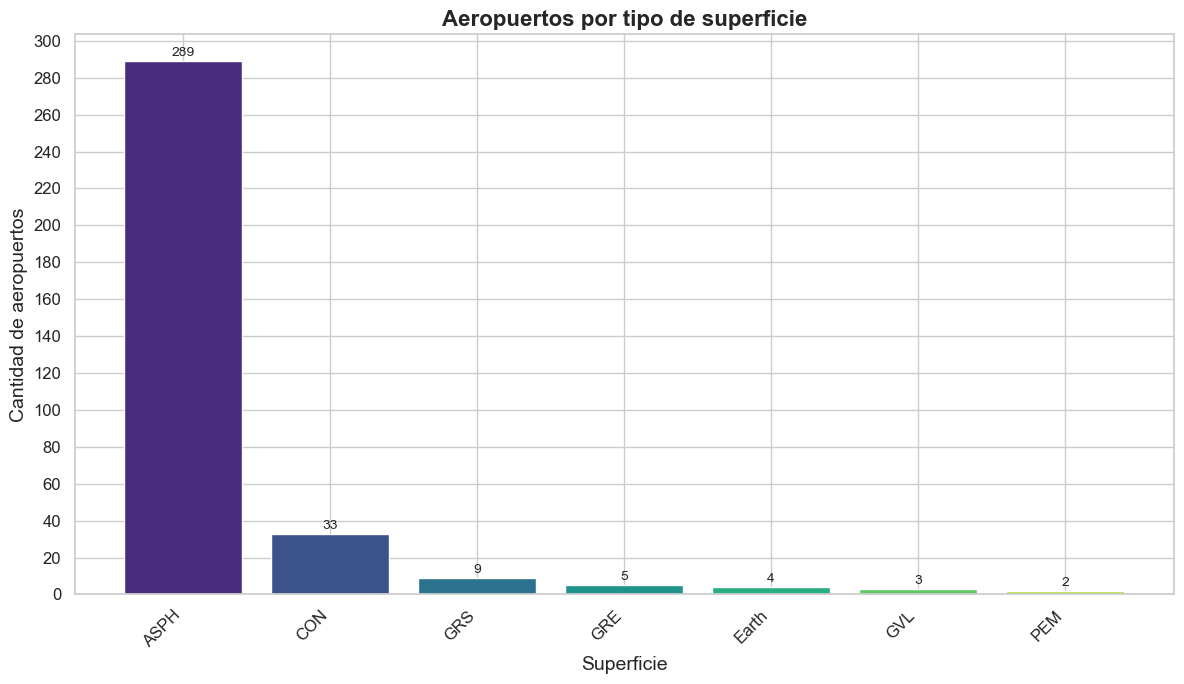

In [2]:
#Grafico de barras para superficies

superficies = sa_airports['surface'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
bars = plt.bar(superficies.index, superficies.values, color=sns.color_palette("viridis", len(superficies)))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(range(0, max(superficies.values) + 20, 20), fontsize=12)
plt.xlabel('Superficie', fontsize=14)
plt.ylabel('Cantidad de aeropuertos', fontsize=14)
plt.title('Aeropuertos por tipo de superficie', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

El anterior gráfico de barras indica los tipos de superficies que se pueden observar en Sur América, estas superficies son: ASPH, CON, GRS, GRE, EARTH, GVL y PEM; los cuales son abreviaciones (en su mayoría) de Asfalto, Concreto, Hierva, Tierra, Grava y Pavimento poroso respectivamente.

Lo que se observa en este gráfico es que la mayoría de los areopuertos en Sur América están hechos de Asfalto, seguido de Concreto que a su vez está seguido por Hierva.
El hecho de que la mayoría de aeropuertos estén hechos de asfalto es un buen indicador, ya que esta característica (explorada de forma individual) indica que las pistas de aterrizaje de América del Sur están capacitadas para recibir aviones comerciales, aviones de carga, aviones ejecutivos, aviones de combate, de entrenamiento, de agricultura y de rescate y emergencia. 

Esto debido a que el Asfalto es un material resistente, que soporta altas cargas y velocidades de dichos aviones.
Sin embargo, aunque este hecho es positivo, podría ser mejor. 

Se puede observar que la segunda superficie más utilizada es el concreto, siendo esta la mejor opción entre las superficies expuestas; esto es debido a que el concreto es mucho más resistente y duradero que el asfalto, soporta cargas más pesadas, resiste cambios de clima y requiere menos mantenimiento si se compara con otras superficies; este material a pesar de ser el segundo más usado, se puede observar que no llegan a cincuenta observaciobes en el contienente, y no es de extrañar, ya que el concreto suele ser sumamente costoso. 

Por otro lado el pero material para las pistas es la tierra, y es que no brinda estabilidad a los aviones y es altamente suceptible a los cambios climáticos, siendo la tercera superficie menos utilizada en el continente.

\newpage


# Longitud de las pistas de aterrizaje 

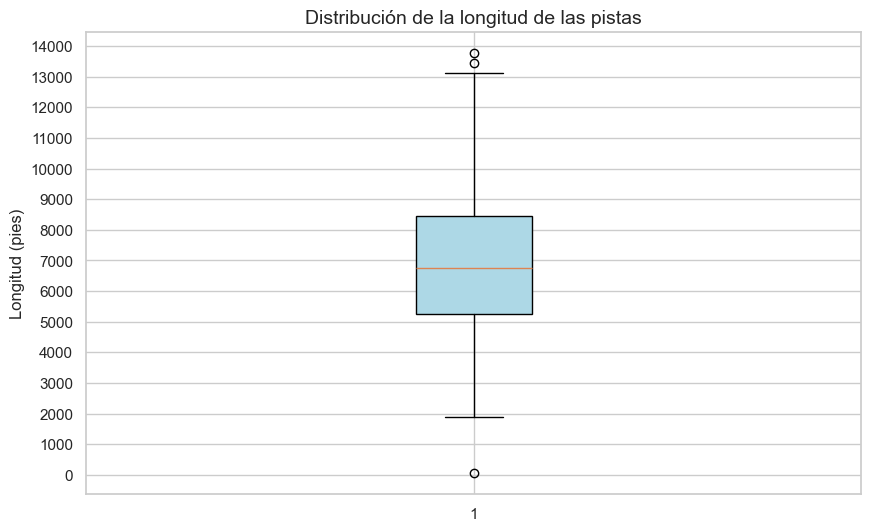

In [3]:
#Grafico de caja para longitud
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['length_ft'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.yticks(range(0, max(sa_airports['length_ft']) + 1000, 1000))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución de la longitud de las pistas', fontsize=14)
plt.grid(True)
plt.show()

En el anterior apartado se mustra un gráfico de caja y bigotes, en este gráfico correspondiente a las longitudes de las pistas de aterrizaje en Sur América, se observa que la mayoría de los aeropuertos tienen longitudes que van desde los 5000 pies hasta los 8000 pies. El 25% de las pistas miden 5000 pies o menos, el 50% miden aproximadamente 7000 pies o menos, el 75% miden 8500 pies o menos y 25% miden 8500 pies o más. 

Es importante destacar que lo ideal sería poseer pistas de aterrizaje largas; lo óptimo sería una pista de aterrizaje de 8000 pies de largo o más, ya que este largo es adecuado para el aterrizaje de múlltiples tipos de aeronaves. 

Teniendo en cuenta esto se observa que las pistas de aterrizaje en suramérica están muy limitadas, ya que el mínimo ideal es el máximo observado dentro de la mayoría, es decir, la mayoría de las pistas de aterrizaje van de 5000 a 8000 pies, mientras que lo ideal es que la pista sea de 8000 pies o más, por lo que solo el 25% de las pistas de aterrizaje en América del Sur entra entre los parámetros ideales de longitud.

\newpage

# Ancho de las pistas de aterrizaje

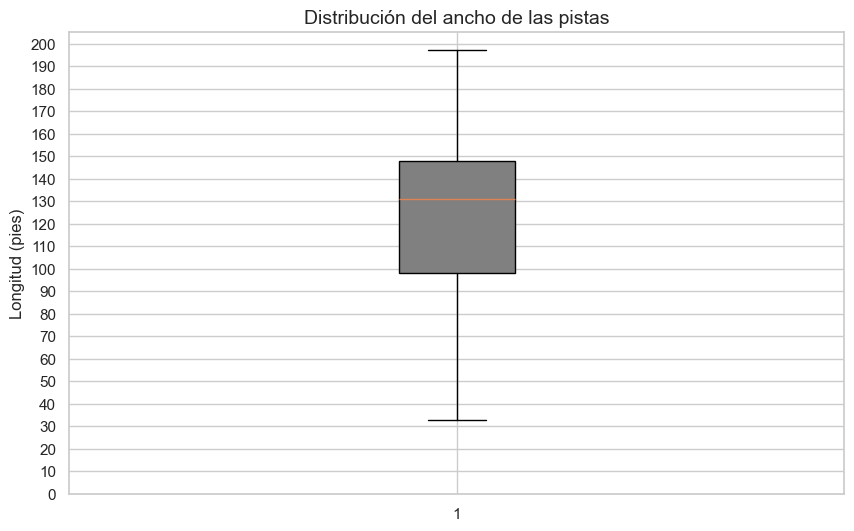

In [4]:
#Grafico de caja para ancho de pista
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['width_ft'], patch_artist=True, boxprops=dict(facecolor='gray', color='black'))
plt.yticks(range(0, max(sa_airports['width_ft']) + 10, 10))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución del ancho de las pistas', fontsize=14)
plt.grid(True)
plt.show()

En el gráfico de anchos de las pistas se puede observar que la mayoría de los aeropuertos tienen anchos de pista desde los 100 pies aproximadamente, hasta aproximadamente 150 pies. 

El 25% de las pistas tienen 100 pies de ancho o menos, el 50% tienen aproxiamdamente 130 pies de ancho o menos, el 75% posee anchos de 150 pies o menos y finalmente otro 25% posee anchos de 150 pies o más.

Al igual que en el caso de la longitud de la pista, aumentar el ancho de las pistas involucra aumentar la posibilidad de recibir aeronaves más grandes; el ancho general para aeropuertos regionales (cuya función es conectar comunidades locales) es de 100 pies o más, es decir, en este aspecto, la mayoría los aeropuertos del contiente cumplen con la medida ideal.

\newpage

# Elevación de las pistas de aterrizaje

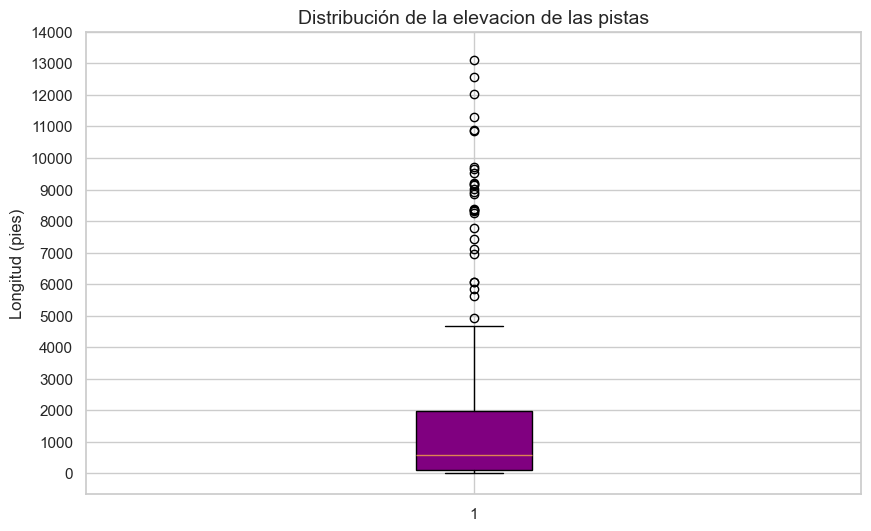

In [5]:
#Grafico de caja para elevacion
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['le_elevation_ft'], patch_artist=True, boxprops=dict(facecolor='purple', color='black'))
plt.yticks(range(0, max(sa_airports['le_elevation_ft']) + 1000, 1000))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución de la elevacion de las pistas', fontsize=14)
plt.grid(True)
plt.show()

En el gráfico de elevación se observa que la mayoría de los aeropuertos se encuentran entre los 0 y los 2000 pies de elevación sobre el nivel del mar. 

El 50% de los aeropuertos tienen una elevación de aproximadamente 300 pies de altura o menos y otro 50% 300 pies o más, mientras que solo un 25% de las pistas tienen elevaciones iguales o superiores a los 2000 pies de altura.

La elevación de las pistas de aterrizaje tienen gran influencia sobre las aeronaves, pues a mayor altitud el aire se vuelve menos denso, por lo tanto se reducen las capacidades de los vehículos aéreos, por lo tanto, mientras más elevada sea la pista, más longitud necesitan las aeronaves para poder despegar y aterrizar.

Como se mencionó anteriormente, la mayoría de las pistas de aterrizaje están en el rango de 0 pies hasta 2000 pies de altura, esto es considerado como una elevación  estándar, donde la densidad del aire es suficientemente cercana a la densidad estándar para que las aeronaves puedan operar sin complicaciones.

\newpage

# Estadísticas descriptivas del continente

In [6]:
#Estadisticas descriptivas de Latinoamerica
sa_airports.describe().round(2)

,length_ft,width_ft,le_elevation_ft
count,345.00,345.00,345.00
mean,6960.77,120.57,1578.21
std,2406.86,32.19,2460.64
min,69.00,33.00,7.00
25%,5249.00,98.00,114.00
50%,6749.00,131.00,570.00
75%,8448.00,148.00,1992.00
max,13779.00,197.00,13110.00


En el contienente se observa un total de 345 pistas de aterrizaje, y el cuadro proporciona descripciones conjuntas de longitud, elevación y ancho, por lo que el análisis de las pistas de aterrizaje de América del Sur puede arrojar los tipos de aviones que pueden aterrizar en esta región.  
El 25% o menos de las pistas son consideradas pistas pequeñas, por lo que, según todas las características conjuntas solo podrían aterrizar aviones pequeños y ejecutivos ligeros.
En el 50% de las pistas pueden aterrizar aviones regionales, aviones de carga pequeños y ejecutivos medianos.
En el 75% de las pistas o menos pueden aterrizar aviones con pasillo único y aviones de carga medianos.
Y en las pistas del 25% más grandes elevadas y anchas podrían aterrizar aciones comerciales dobles, de carga pesada y ejecutivos grandes, siempre y cuando estos tengan capacidades para aterrizar en grandes alturas.

\newpage

# Estadísticas descriptivas por país

In [11]:
import pandas as pd
print(pd.__version__)

2.2.2


In [25]:
##stats_pais = 
sa_airports.groupby('code', observed=False).agg({
    'length_ft': ['count', 'mean', 'min', 'max'],
    'width_ft': ['mean', 'min', 'max'],
    'le_elevation_ft': ['mean', 'min', 'max']
}).round(1).transpose()

code                        AR       BO       BR       CL       CO       EC  \
length_ft       count     61.0     15.0     93.0     30.0     48.0     27.0   
                mean    7457.0   8375.4   6087.5   6627.4   6502.8   6991.6   
                min     3281.0   3940.0     69.0   2625.0   2707.0   2077.0   
                max    11644.0  13123.0  13123.0  12303.0  12467.0  13445.0   
width_ft        mean     128.4    121.7    116.3    125.6    108.1    103.5   
                min       66.0     98.0     40.0     59.0     33.0     39.0   
                max      197.0    151.0    197.0    164.0    164.0    151.0   
le_elevation_ft mean     893.3   3896.4   1321.9    752.2   1796.3   2981.3   
                min        7.0    400.0     10.0     12.0      7.0      8.0   
                max     4678.0  13110.0   3497.0   7424.0   9723.0   9646.0   

code                       FK       GF      GY       PE       PY       SR  \
length_ft       count     1.0      2.0     1.0     29.0      7.0      1.0   
                mean   5003.0   6555.5  7448.0   8550.8   8095.6  11417.0   
                min    5003.0   2625.0  7448.0   3355.0   4987.0  11417.0   
                max    5003.0  10486.0  7448.0  13779.0  11483.0  11417.0   
width_ft        mean     75.0     98.5   148.0    132.5    128.0    148.0   
                min      75.0     49.0   148.0     65.0     75.0    148.0   
                max      75.0    148.0   148.0    150.0    148.0    148.0   
le_elevation_ft mean    215.0     19.5    96.0   3457.3    684.4     56.0   
                min     215.0     18.0    96.0     11.0    223.0     56.0   
                max     215.0     21.0    96.0  12552.0   1870.0     56.0   

code                       UY       VE  
length_ft       count     8.0     22.0  
                mean   4838.0   7944.0  
                min    2297.0   3937.0  
                max    7477.0  10645.0  
width_ft        mean    119.9    140.7  
                min      75.0     98.0  
                max     148.0    190.0  
le_elevation_ft mean    173.8    567.1  
                min      36.0     10.0  
                max     466.0   2145.0

El anterior cuadro expresa el promedio, mínimo y máximo de las longitudes, anchos y alturas de las pistas de aterrizaje de las 345 pistas que se encuentran en la Base de Datos de Sur América. Si se observa cada país, según los estándares de la Organización de Aviación Civil Internacional, se puede decir que:
En Argentina, en promedio las pistas de aterrizaje tienen una longitud de 7457 pies, un ancho de 128.4 pies y una elevación de 893.3 pies, lo que indica que la mayoría de los aeropuertos en Argentina pueden recibir aviones de pasillo único y aviones ejecutivos grandes. Como mínimo, según la información observada, podría recibir aviones pequeños y como máximo aviones comerciales con pasillo doble.

En Bolivia, con um promedio de 8375.4 pies, ancho de 121.7 pies y elevación de 3896.4 pies, podría rebibir aviones comervuales con pasillo único; como mínimo aviones pequeños y como máximo aviones comerciales de doble pasillo (con limitaciones de peso debido a la elevación máxima en las pistas)

En Brasil se observa un promedio más pequeño, de 6087.5 pies de largo, 116.3 pies de ancho y  elevación de 1321.9 pies, indicando que en promedio, podría recibir aviones comerciales regionales (más pequeños que los aviones comerciales de pasillos único) y aviones ejecutivos medianos. Como mínimo podría recibir Helicópteros y aviones ultraligeros y como máximo aviones comerciales de doble pasillo.

Chile tiene un promedio de 6627.4 pies de longitud en sus pistas de aterrizaje, 125.6 pies de ancho y  elevación de 752.2 pies; en promedio pueden aterrizar aviones comerciales de pasillo único. Como mínimo pueden aterrizar aviones pequeños y como máximo aviones comerciales de pasillo doble.

En Colombia se observan aeropuertos con longitudes promedio de 6502.8 pies, ancho de 108.1 pies y elevación de 1796.3 pies, dejando un uso promedio para aviones comerciales regionales. Como mínimo podría tener aviones pequeños y  como máximo aviones comerciales de doble pasillo. 

Ecuador posee longitudes promedio de 6991.6 pies, ancho de 103.5 pies y elevación de 2991.3 pies, brindando capacidad para aviones comerciales de pasillo único. Como mínimo aviones pequeños y como máximo aviones comerciales de doble pasillo, debido a la elevación máxima se debe considerar el peso del avión comercial con doble pasillo.
En Paraguay se observan pistas con promedios de 8095.6 pies de largo, anchod e 128 pies y elevación de 684.4 pies, queriendo decir que en promedio podrían aterrizar aviones de pasillo único. Como mínimo aviones pequeños  y como máximo aviones comerciales con pasillo doble. 

Perú posee pistas de 8550.8 pies de longitud, 132.5 pies de ancho y elevación de 3457.4 pies, en promedio tiene capacidad para aviones con pasillo único. Como mínimo aviones pequeños y como máximo aviones comerciales de doble pasillo, este último con limitaciones de peso debido a que la elevación máxima de las pistas de Perú son de 12552 pies.
Uruguay poseee pistas con promedios de 4838 pies de longitud, ancho de 119.9 pies y elevación de 173.8 pies, brindando espacios para aviones comerciales regionales. En sus pistas más pequeñas aviones pequeños y en sus pistas con características más altas aciones con pasillo único.

Finalmente se observa a Venezuela, con un promedio de longitu de 7944 pies, ancho de 140.7 pies y elevación de 567.1 pies, queriendo decir que sus pistas son óptimas para aviones comrciales de pasillo único. En sus pistas más básicas pueden aterrizar aviones pequeños y en sus mejores pistas aviones comerciales con pasillo doble.

\newpage

# Conclusión 
Los datos estudiados muestran las características de las pistas de aterrizaje de Sur América, estas características fueron la longitud, elevación y el ancho, medidas en pies; además del tipo de superficie de la pista de aterrizaje.

El estudio arroja como resultado que la mayoría de las pistas de aterrizaje de Sur América son aptas para una gran cantidad de aviones, sin embargo, podría mejorar. Tal y como se mencionó cuando se esstudiaban las superficies, el asfalto, aunque es un buen material para elaborar pistas de aterrizaje, no es el mejor; en su lugar, lograr que las pistas de aterrizaje tengan Concreto en su supercufie sería lo más ideal.

Las pistas de aterrizaje de suramérica varían significativamente, se pueden encontrar pistas muy pequeñas de 69 pies que solo podrían recibir Helicópteros y aviones sumamente ligeros, hasta pistas muy grandes como en Perú, de 13779 pies que podría recibir aviones de comerciales de pasillo doble.

Se informó sobre el impacto de la elevación de la pista en las aeronaves y lo importante que es que la mayoría de pistas de Sur América estén en una elevación adecuada. Además, se descubrió que en promedio los paises suramericanos pueden albergar aviones con pasillo único.

En resumen, las pistas de aterrizaje en Sur América presentan una alta variabilidad en tamaños y superficies, dejando al descubierto las condiciones sociales, económicas y geográficas del continente, y a pesar de que permite una amplia gamma de operaciones aéreas, existen varias limitaciones a la hora de enviar diversos tipos de aviones, como por ejemplo los aviones comerciales de doble pasillo ya que requieren pistas más largas y anchas, aviones de carga pesada, ya que requieren pistas largas y más resistentes, aviones militares de gran tamaño y otros.